In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt 
import os 
from Utils.Read_data import *

c:\Users\anisr\anaconda3\envs\work\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\anisr\anaconda3\envs\work\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\anisr\anaconda3\envs\work\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
path = "DataPaper/"
users = os.listdir(path)

In [4]:
df_activity =create_dataset(users,'activity')
df_activity.head()

NO data for actigraph_expanded.csv


,Activity,Start,End,Day,user
0,2.0,10:00,10:22,1,user_1
1,9.0,10:37,10:40,1,user_1
2,10.0,10:40,10:45,1,user_1
3,6.0,10:55,11:00,1,user_1
4,2.0,11:00,11:20,1,user_1


In [5]:
df_actigraph = create_dataset(users,'actigraph')
df_actigraph.head()

NO data for actigraph_expanded.csv


,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,day,time,user
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1


In [6]:
# df_actigraph.dropna(axis=1,inplace=True)

In [7]:
df_actigraph['time'] = pd.to_datetime(df_actigraph['time'],format='%H:%M:%S').dt.time

In [8]:
df_activity['Start'] = df_activity.apply(convert_Activity_Start_datetime,axis=1)

In [9]:
df_activity['End'] = df_activity.apply(convert_Activity_End_datetime,axis=1)

In [10]:
df_activity

,Activity,Start,End,Day,user
0,2.0,10:00:00,10:22:00,1,user_1
1,9.0,10:37:00,10:40:00,1,user_1
2,10.0,10:40:00,10:45:00,1,user_1
3,6.0,10:55:00,11:00:00,1,user_1
4,2.0,11:00:00,11:20:00,1,user_1
...,...,...,...,...,...
14,1.0,05:15:00,05:25:00,2,user_9
15,NaN,05:25:00,09:00:00,2,user_9
16,6.0,11:10:00,11:20:00,1,user_9
17,12.0,23:30:00,23:40:00,1,user_9


In [11]:
df_actigraph = df_actigraph.rename(columns={'day':'Day'})

In [12]:
df_actigraph.shape

(1462678, 13)

In [13]:
expanded_rows = []
for idx, actigraph_row in df_actigraph.iterrows():
    day = actigraph_row['Day']
    time = actigraph_row['time']
    user = actigraph_row['user']

    mask = (df_activity['Day'] == day) & (df_activity['user'] == user) & \
           (df_activity['Start'] <= time) & (df_activity['End'] >= time)

    matched_activities = df_activity.loc[mask, 'Activity'].values

    if len(matched_activities) > 0:
        for activity in matched_activities:
            new_row = actigraph_row.copy()
            new_row['Activity'] = activity
            expanded_rows.append(new_row)
    else:
        new_row = actigraph_row.copy()
        new_row['Activity'] = 0
        expanded_rows.append(new_row)

In [14]:
activity

3.0

In [15]:
df_expanded = pd.DataFrame(expanded_rows)

In [16]:
df_expanded

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1,2.0
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1,2.0
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1,2.0
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1,2.0
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64116,NaN,NaN,NaN,NaN,85.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:23,user_9,0.0
64117,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:30,user_9,0.0
64118,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:31,user_9,0.0
64119,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:32,user_9,0.0


In [17]:
df_expanded[~df_expanded['Activity'].isna()]

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1,2.0
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1,2.0
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1,2.0
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1,2.0
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64116,NaN,NaN,NaN,NaN,85.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:23,user_9,0.0
64117,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:30,user_9,0.0
64118,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:31,user_9,0.0
64119,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:32,user_9,0.0


In [18]:
df_expanded[df_expanded['user'] == 'user_22']

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,70.0,1.0,NaN,NaN,NaN,NaN,1,09:12:09,user_22,3.0
1,NaN,NaN,NaN,NaN,71.0,1.0,NaN,NaN,NaN,NaN,1,09:12:10,user_22,3.0
2,NaN,NaN,NaN,NaN,71.0,1.0,NaN,NaN,NaN,NaN,1,09:12:11,user_22,3.0
3,NaN,NaN,NaN,NaN,71.0,1.0,NaN,NaN,NaN,NaN,1,09:12:12,user_22,3.0
4,NaN,NaN,NaN,NaN,71.0,1.0,NaN,NaN,NaN,NaN,1,09:12:13,user_22,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67869,90.0,115.0,80.0,NaN,72.0,NaN,1.0,NaN,NaN,166.51,2,08:38:51,user_22,0.0
67870,33.0,49.0,28.0,1.0,72.0,NaN,1.0,NaN,NaN,65.38,2,08:38:52,user_22,0.0
67871,32.0,25.0,34.0,NaN,72.0,NaN,1.0,NaN,NaN,52.96,2,08:38:53,user_22,0.0
67872,59.0,28.0,188.0,1.0,72.0,NaN,1.0,NaN,NaN,199.02,2,08:38:54,user_22,0.0


In [19]:
df_expanded.fillna(0).to_csv('DataPaper/actigraph_expanded.csv',index=False)

In [20]:
dict_activity = {0: 'sleeping',
                 1: 'laying down',
                 2: 'sitting',
                 3: 'light movement',
                 4: 'medium movement',
                 5: 'heavy movement',
                 6: 'eating',
                 7: 'small screen usage',
                 8: 'large screen',
                 9: 'coffee/coke',
                 10: 'smoking',
                 11: 'alcohol assumption',
                 12: 'saliva samples'}
df_expanded['Activity'] = df_expanded['Activity'].replace(
    dict_activity)  

In [21]:
df_expanded

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1,sitting
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1,sitting
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1,sitting
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1,sitting
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64116,NaN,NaN,NaN,NaN,85.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:23,user_9,sleeping
64117,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:30,user_9,sleeping
64118,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:31,user_9,sleeping
64119,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:32,user_9,sleeping


C:\Users\anisr\AppData\Local\Temp\ipykernel_1292\1535878805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['time'] = pd.to_datetime(df_user['time'], format='%H:%M:%S').dt.time
C:\Users\anisr\AppData\Local\Temp\ipykernel_1292\1535878805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['Day'] = pd.to_datetime(df_user['Day'], format='%d', errors='coerce')
C:\Users\anisr\AppData\Local\Temp\ipykernel_1292\1535878805.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

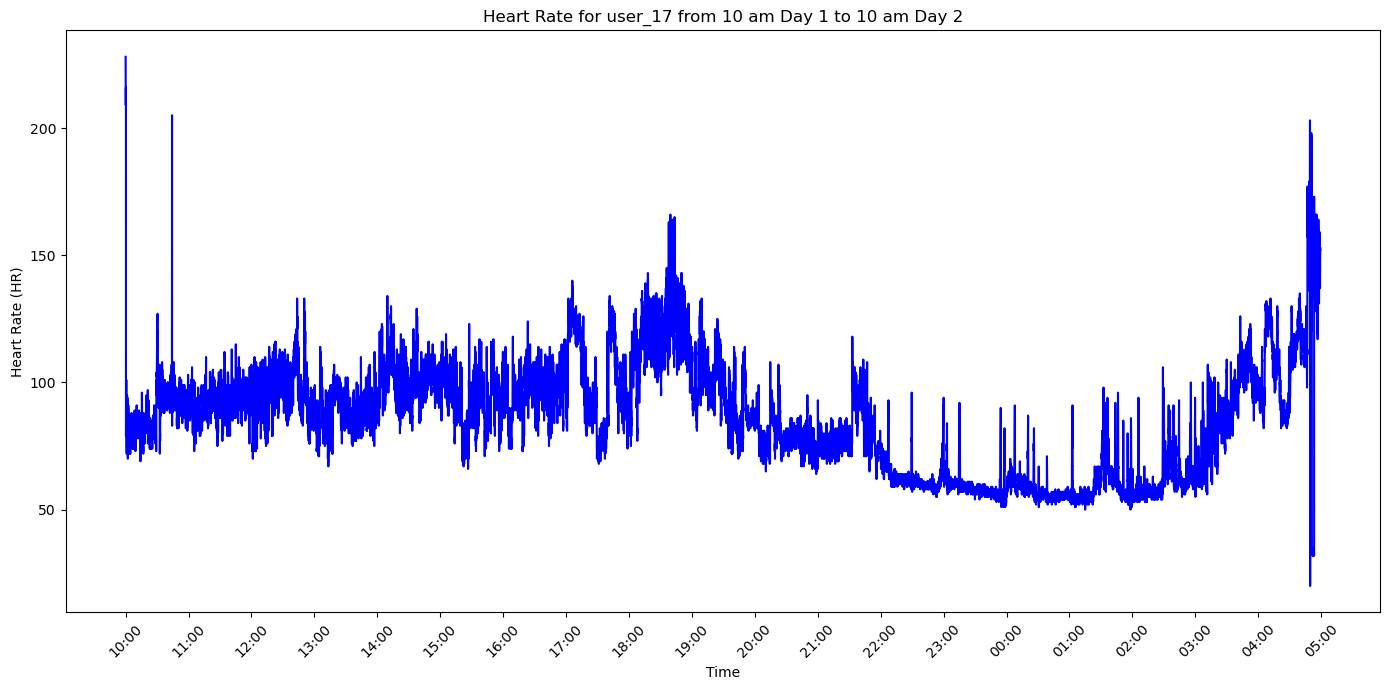

In [22]:
import matplotlib.dates as mdates

user_to_plot = 'user_17'  
df_user = df_expanded[df_expanded['user'] == user_to_plot]

df_user['time'] = pd.to_datetime(df_user['time'], format='%H:%M:%S').dt.time

df_user['Day'] = pd.to_datetime(df_user['Day'], format='%d', errors='coerce')

df_user['datetime'] = pd.to_datetime(df_user['Day'].astype(
    str) + ' ' + df_user['time'].astype(str), errors='coerce')

start_time = pd.Timestamp('2024-01-01 10:00:00')
df_user['datetime'] = start_time + pd.to_timedelta(df_user.index, unit='s')

plt.figure(figsize=(14, 7))

plt.plot(df_user['datetime'], df_user['HR'], color='blue', label='Heart Rate')

plt.title(f'Heart Rate for {user_to_plot} from 10 am Day 1 to 10 am Day 2')
plt.xlabel('Time')
plt.ylabel('Heart Rate (HR)')

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [23]:
df_expanded[(df_expanded['HR']>155) & (df_expanded['time'] > dt.time(10,00,00)) & (df_expanded['time'] < dt.time(10,30,00)) & (df_expanded['Day'] ==1)]['user'].unique()

array(['user_1', 'user_17', 'user_3'], dtype=object)

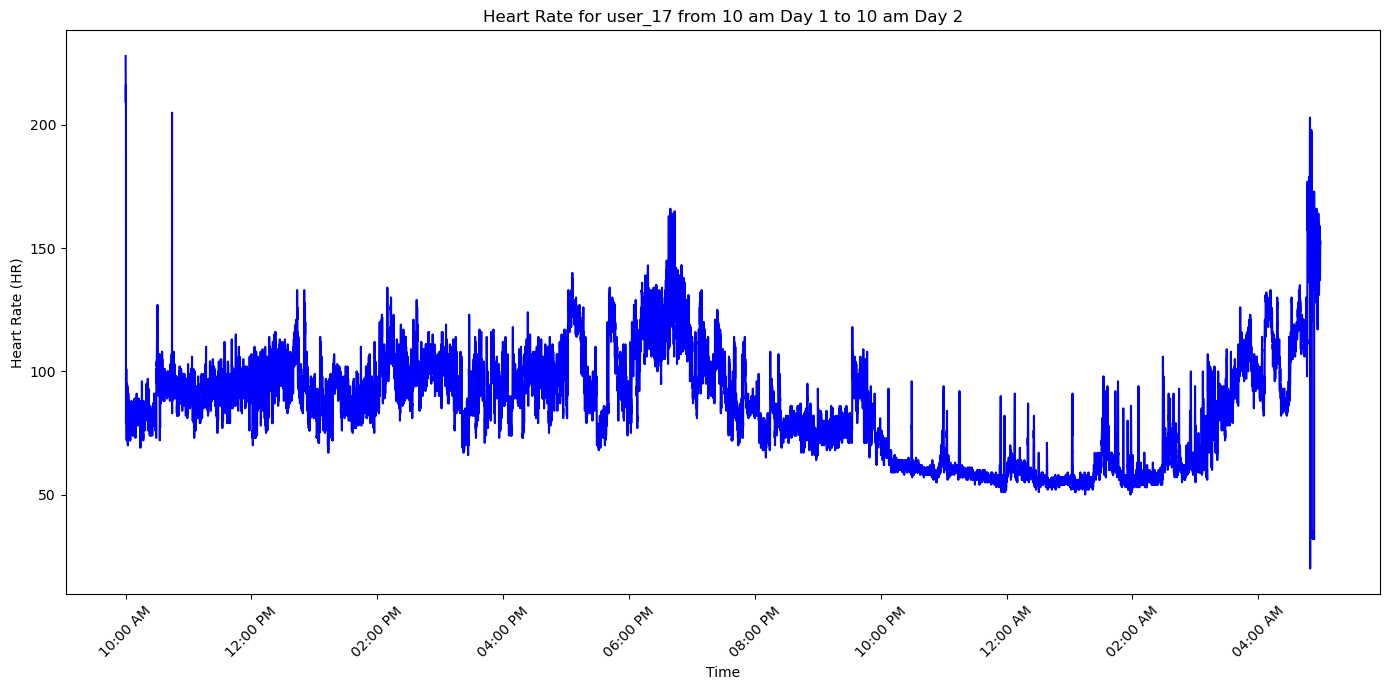

In [24]:
import warnings
warnings.filterwarnings("ignore", category=Warning)
user_to_plot = 'user_17'
df_user = df_expanded[df_expanded['user'] == user_to_plot]

df_user['time'] = pd.to_datetime(df_user['time'], format='%H:%M:%S').dt.time
df_user['Day'] = pd.to_datetime(df_user['Day'], format='%d', errors='coerce')

df_user['datetime'] = pd.to_datetime(df_user['Day'].astype(
    str) + ' ' + df_user['time'].astype(str), errors='coerce')

start_time = pd.Timestamp('2024-01-01 10:00:00')
df_user['datetime'] = start_time + pd.to_timedelta(df_user.index, unit='s')

plt.figure(figsize=(14, 7))

plt.plot(df_user['datetime'], df_user['HR'], color='blue', label='Heart Rate')

plt.title(f'Heart Rate for {user_to_plot} from 10 am Day 1 to 10 am Day 2')
plt.xlabel('Time')
plt.ylabel('Heart Rate (HR)')

plt.gca().xaxis.set_major_locator(
    mdates.HourLocator(interval=2))  
plt.gca().xaxis.set_major_formatter(
    mdates.DateFormatter('%I:%M %p'))  

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [38]:
df_user = df_expanded[df_expanded['user'] == user_to_plot]

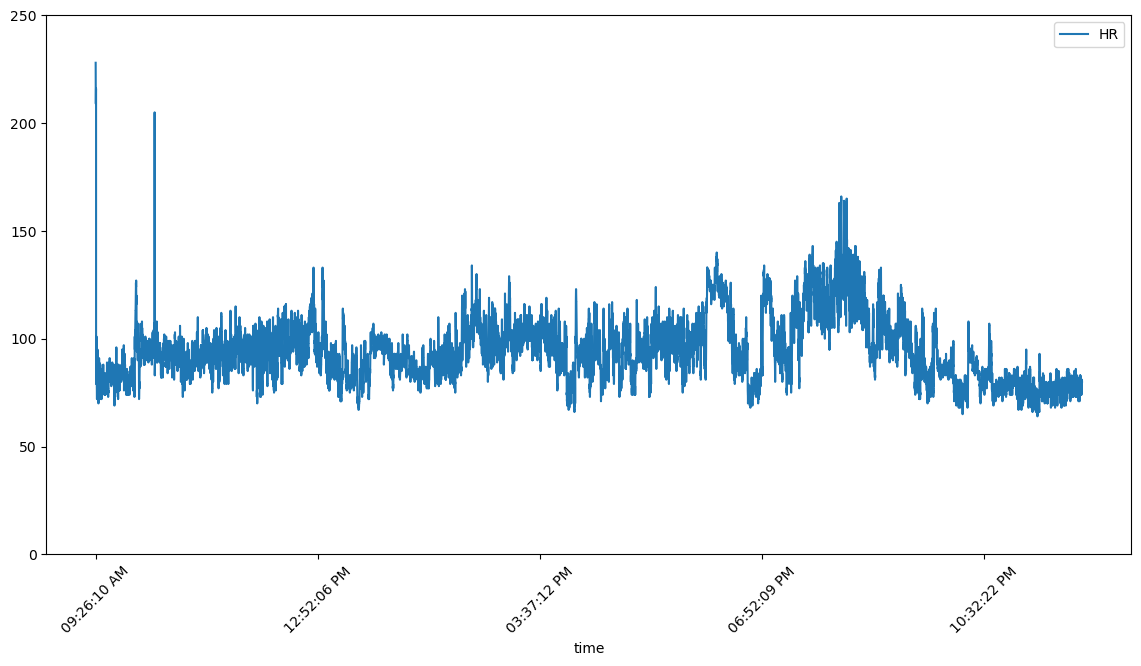

In [39]:
df_user_day1 = df_user[(df_user['Day'] == 1)].copy()
df_user_day1['time'] = pd.to_datetime(df_user_day1['time'], format='%H:%M:%S').dt.strftime('%I:%M:%S %p')

df_user_day1.plot(x='time', y='HR', kind='line', figsize=(14, 7))

plt.ylim(0, 250)
plt.xticks(rotation=45)
plt.show()

In [40]:
df_user_day1['Activity'].value_counts()

Activity
light movement    17539
sleeping          16823
eating             4620
heavy movement     3422
coffee/coke        1969
sitting              51
Name: count, dtype: int64

In [42]:
df_user_day1

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,14.0,NaN,58.0,1.0,228.0,NaN,1.0,NaN,NaN,59.67,1,09:26:10 AM,user_17,sleeping
1,NaN,NaN,19.0,NaN,215.0,NaN,NaN,1.0,NaN,19.00,1,09:26:11 AM,user_17,sleeping
2,64.0,116.0,50.0,NaN,215.0,NaN,1.0,NaN,NaN,141.61,1,09:26:12 AM,user_17,sleeping
3,10.0,208.0,133.0,1.0,215.0,NaN,1.0,NaN,NaN,247.09,1,09:26:13 AM,user_17,sleeping
4,36.0,56.0,78.0,NaN,215.0,NaN,1.0,NaN,NaN,102.55,1,09:26:14 AM,user_17,sleeping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41515,NaN,NaN,NaN,NaN,80.0,NaN,NaN,1.0,NaN,NaN,1,11:59:49 PM,user_17,sleeping
41516,NaN,NaN,NaN,NaN,80.0,NaN,NaN,1.0,NaN,NaN,1,11:59:50 PM,user_17,sleeping
41517,NaN,NaN,NaN,NaN,80.0,NaN,NaN,1.0,NaN,NaN,1,11:59:57 PM,user_17,sleeping
41518,NaN,NaN,NaN,NaN,80.0,NaN,NaN,1.0,NaN,NaN,1,11:59:58 PM,user_17,sleeping


In [48]:
df_expanded.to_csv('DataPaper/actigraph_expanded.csv',index=False)

In [50]:
users = ['user_1', 'user_17', 'user_3']
df_filtered = df_expanded[df_expanded['user'].isin(users)]

In [51]:
df_filtered.shape

(208492, 14)

In [69]:
df_filtered['time'] = pd.to_datetime(
    df_filtered['time'], format='%H:%M:%S').dt.time
df_filtered['Day'] = pd.to_datetime(
    df_filtered['Day'], format='%d', errors='coerce')

In [70]:
df_filtered['datetime'] = pd.to_datetime(
    df_filtered['Day'].astype(str) + ' ' + df_filtered['time'].astype(str))

In [71]:
df_sleeping = df_filtered[df_filtered['Activity'] == 'sleeping']
df_coffee = df_filtered[df_filtered['Activity'] == 'coffee/coke']

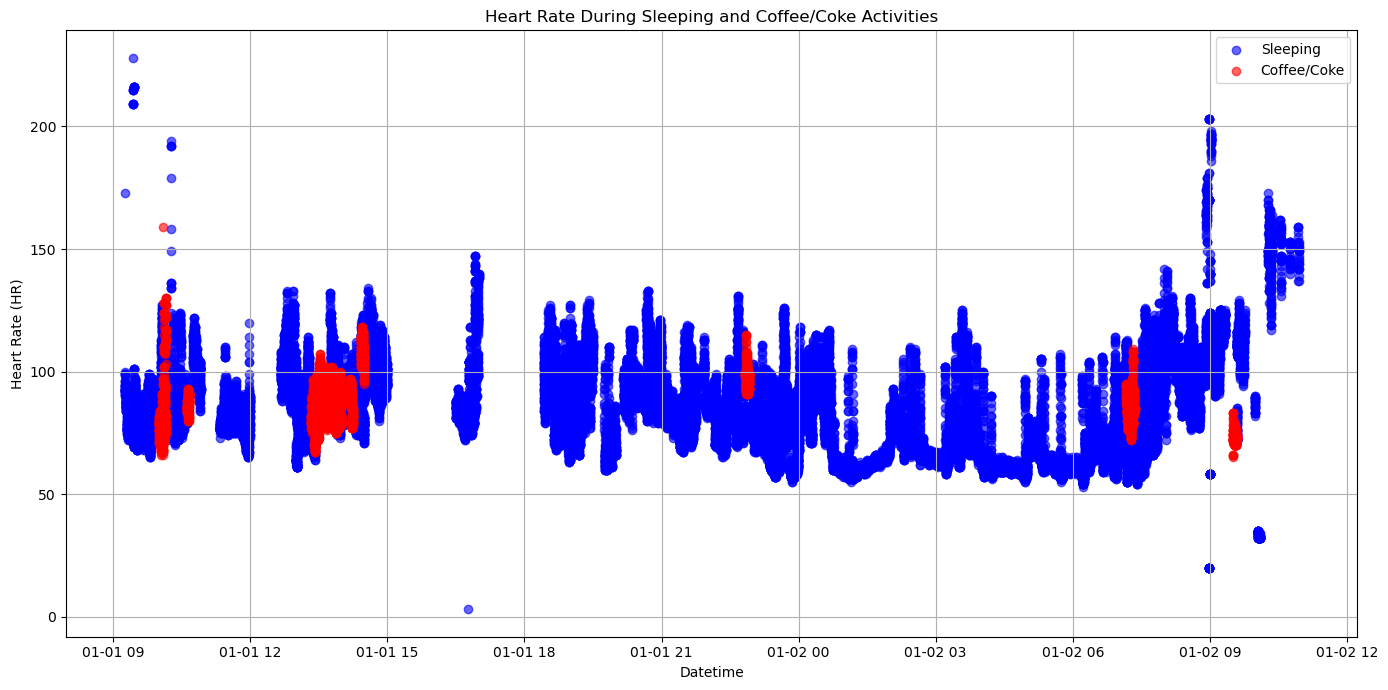

In [72]:
plt.figure(figsize=(14, 7))

plt.scatter(df_sleeping['datetime'], df_sleeping['HR'],
            label='Sleeping', color='blue', alpha=0.6, )

plt.scatter(df_coffee['datetime'], df_coffee['HR'],
            label='Coffee/Coke', color='red', alpha=0.6)

plt.title('Heart Rate During Sleeping and Coffee/Coke Activities')
plt.xlabel('Datetime')
plt.ylabel('Heart Rate (HR)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [75]:
df_user_day1

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,14.0,NaN,58.0,1.0,228.0,NaN,1.0,NaN,NaN,59.67,1,09:26:10 AM,user_17,sleeping
1,NaN,NaN,19.0,NaN,215.0,NaN,NaN,1.0,NaN,19.00,1,09:26:11 AM,user_17,sleeping
2,64.0,116.0,50.0,NaN,215.0,NaN,1.0,NaN,NaN,141.61,1,09:26:12 AM,user_17,sleeping
3,10.0,208.0,133.0,1.0,215.0,NaN,1.0,NaN,NaN,247.09,1,09:26:13 AM,user_17,sleeping
4,36.0,56.0,78.0,NaN,215.0,NaN,1.0,NaN,NaN,102.55,1,09:26:14 AM,user_17,sleeping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41515,NaN,NaN,NaN,NaN,80.0,NaN,NaN,1.0,NaN,NaN,1,11:59:49 PM,user_17,sleeping
41516,NaN,NaN,NaN,NaN,80.0,NaN,NaN,1.0,NaN,NaN,1,11:59:50 PM,user_17,sleeping
41517,NaN,NaN,NaN,NaN,80.0,NaN,NaN,1.0,NaN,NaN,1,11:59:57 PM,user_17,sleeping
41518,NaN,NaN,NaN,NaN,80.0,NaN,NaN,1.0,NaN,NaN,1,11:59:58 PM,user_17,sleeping


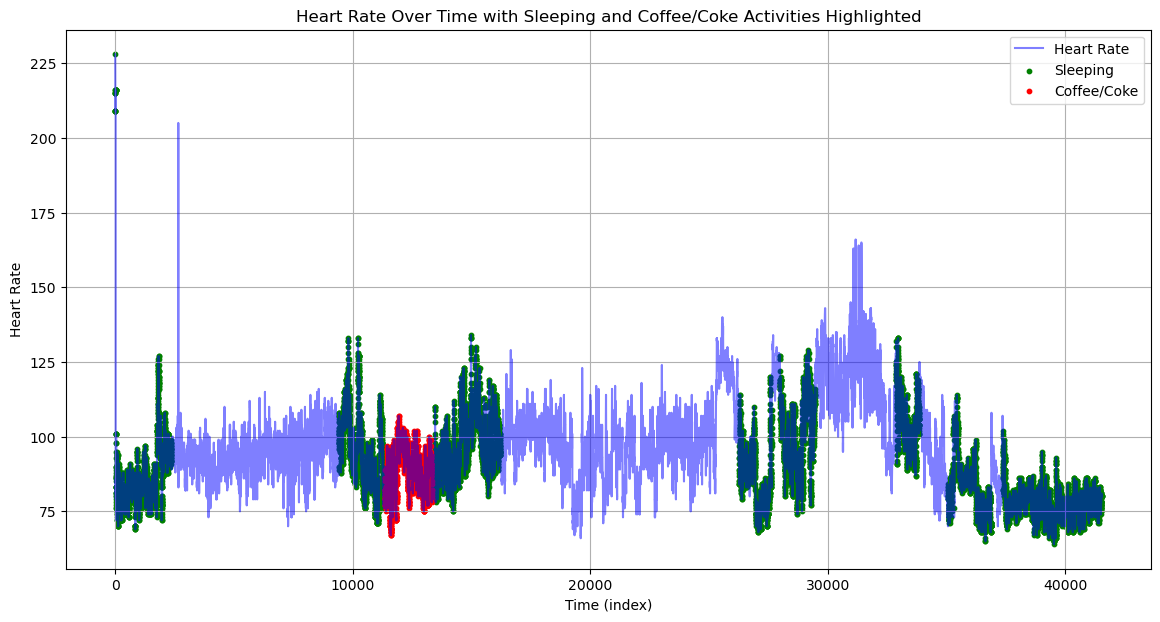

In [101]:
plt.figure(figsize=(14, 7))

plt.plot(df_user_day1.index,
         df_user_day1['HR'], label='Heart Rate', color='blue', alpha=0.5)

sleeping = df_user_day1[df_user_day1['Activity'] == 'sleeping']
plt.scatter(sleeping.index, sleeping['HR'],
            color='green', label='Sleeping', s=10)

coffee = df_user_day1[df_user_day1['Activity'] == 'coffee/coke']
plt.scatter(coffee.index, coffee['HR'], color='red', label='Coffee/Coke', s=10)

plt.xlabel('Time (index)')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Over Time with Sleeping and Coffee/Coke Activities Highlighted')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
hours = mdates.HourLocator(interval=1)

In [103]:
df_user_day1['time_conv'] = pd.to_datetime(df_user_day1['time'], format='%H:%M:%S %p').dt.time

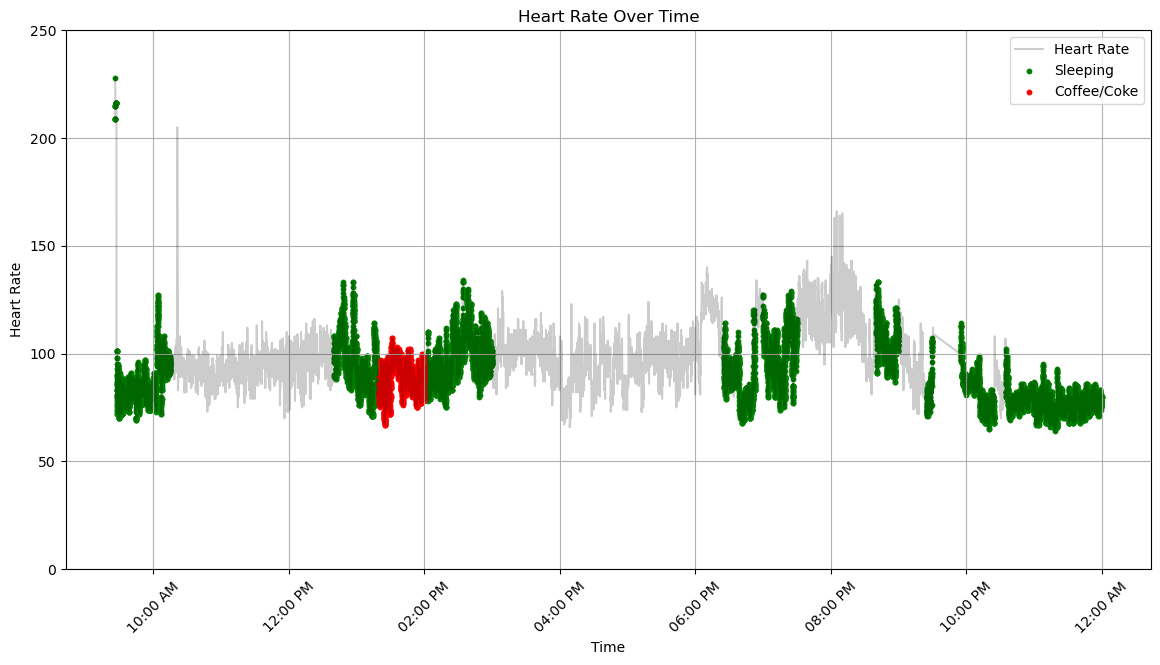

In [110]:
df_user_day1['time'] = pd.to_datetime(
    df_user_day1['time'], format='%I:%M:%S %p')

plt.figure(figsize=(14, 7))

plt.plot(df_user_day1['time'], df_user_day1['HR'],
         label='Heart Rate', color='black', alpha=0.2)

sleeping = df_user_day1[df_user_day1['Activity'] == 'sleeping']
plt.scatter(sleeping['time'], sleeping['HR'],
            color='green', label='Sleeping', s=10)

coffee = df_user_day1[df_user_day1['Activity'] == 'coffee/coke']
plt.scatter(coffee['time'], coffee['HR'],
            color='red', label='Coffee/Coke', s=10)

plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Over Time')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(
    plt.matplotlib.dates.DateFormatter('%I:%M %p'))
plt.xticks(rotation=45)
plt.ylim(0, 250)
plt.show()

In [112]:
df_user_day2 = df_user[(df_user['Day'] == 2)].copy()

In [114]:
df_user_day2['time'] = pd.to_datetime(
    df_user_day2['time'], format='%H:%M:%S').dt.strftime('%I:%M:%S %p')

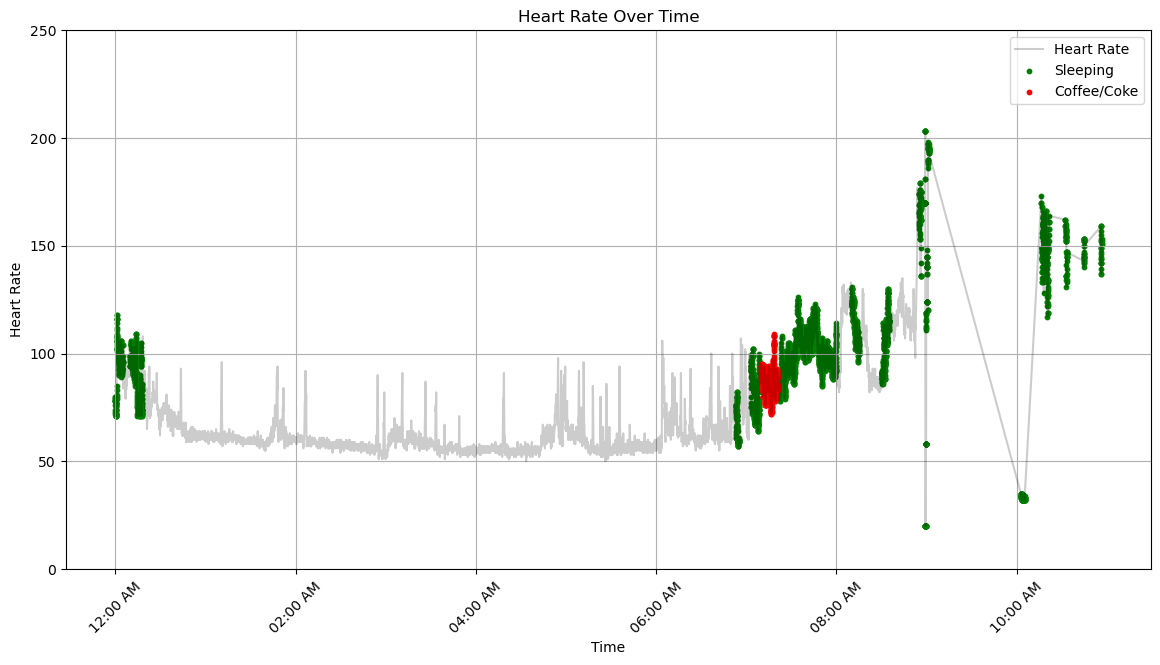

In [117]:
df_user_day2['time'] = pd.to_datetime(df_user_day2['time'], format='%I:%M:%S %p')
plt.figure(figsize=(14, 7))

plt.plot(df_user_day2['time'], df_user_day2['HR'],
         label='Heart Rate', color='black', alpha=0.2)

sleeping = df_user_day2[df_user_day2['Activity'] == 'sleeping']
plt.scatter(sleeping['time'], sleeping['HR'],
            color='green', label='Sleeping', s=10)

coffee = df_user_day2[df_user_day2['Activity'] == 'coffee/coke']
plt.scatter(coffee['time'], coffee['HR'],
            color='red', label='Coffee/Coke', s=10)

plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Over Time')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(
    plt.matplotlib.dates.DateFormatter('%I:%M %p'))
plt.xticks(rotation=45)
plt.ylim(0, 250)
plt.show()

In [119]:
user = []
hr_upper = []
hr_lower = []
for i in range(1, 23):
    user.append(i)
    mean = df_expanded[df_expanded['user']
                               == i].describe().HR.loc['mean']
    std = df_expanded[df_expanded['user']
                              == i].describe().HR.loc['std']
    hr_upper.append(mean + (2*std))
    hr_lower.append(mean - (2*std))

idx_outliers = []
for usr, upp, low in zip(user, hr_upper, hr_lower):
    id_list = df_expanded[(df_expanded['user'] == usr) &
                                  ((df_expanded['HR'] >= upp) |
                                   (df_expanded['HR'] <= low))].index.tolist()
    if id_list:
        idx_outliers.extend(id_list)
print(len(idx_outliers))

Actigraphy_labelled = df_expanded.drop(
    df_expanded.index[idx_outliers])
Actigraphy_labelled

0


,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1,sitting
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1,sitting
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1,sitting
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1,sitting
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64116,NaN,NaN,NaN,NaN,85.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:23,user_9,sleeping
64117,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:30,user_9,sleeping
64118,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:31,user_9,sleeping
64119,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:32,user_9,sleeping


In [120]:
Actigraphy_labelled['Day'].value_counts()

Day
 1     958743
 2     513089
-29     47426
Name: count, dtype: int64

In [122]:
958743 + 513089

1471832

In [123]:
Actigraphy_labelled = Actigraphy_labelled.reset_index()

# Remove unnecessary columnns
Actigraphy_labelled = Actigraphy_labelled.drop(columns=['index'])
Actigraphy_labelled

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1,sitting
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1,sitting
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1,sitting
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1,sitting
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519253,NaN,NaN,NaN,NaN,85.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:23,user_9,sleeping
1519254,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:30,user_9,sleeping
1519255,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:31,user_9,sleeping
1519256,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:32,user_9,sleeping


In [125]:
user = np.array(Actigraphy_labelled['user'])

user_ends = list(np.where(user[:-1] != user[1:])[0])
user_ends.append(len(user)-1)

user_starts = [0]
user_starts.extend([i+1 for i in user_ends[:-1]])

In [126]:
start_list = []
end_list = []

# iterate through each user
for idx in range(len(user_starts)):

    # iterate through each row of each user
    for i in range(user_starts[idx], user_ends[idx]+1):
        if i == user_starts[idx]:
            start_list.append(i)
            start_time = Actigraphy_labelled.time.iloc[i]
            end_time = (dt.datetime.combine(dt.date(1, 1, 1),
                        start_time) + dt.timedelta(minutes=5)).time()
        # until we get to the last row for a user, do...
        elif i != user_ends[idx]:
            # skip rows until we get to the first time that is 1 mins or more from the current interval start time
            if Actigraphy_labelled.time.iloc[i] >= end_time:
                start_time = Actigraphy_labelled.time.iloc[i]
                end_time = (dt.datetime.combine(dt.date(1, 1, 1),
                            start_time) + dt.timedelta(minutes=5)).time()
                end_list.append(i-1)
                start_list.append(i)
            elif i >= (start_list[-1]+300):
                start_time = Actigraphy_labelled.time.iloc[i]
                end_time = (dt.datetime.combine(dt.date(1, 1, 1),
                            start_time) + dt.timedelta(minutes=5)).time()
                end_list.append(i-1)
                start_list.append(i)

        else:
            end_list.append(i)
            print(i)

68434
129643
201360
271099
338450
415085
487978
559384
631181
700524
769351
832721
901408
971298
1039595
1107855
1180032
1252177
1319584
1388798
1454156
1519257


In [132]:
Actigraphy_labelled['Activity'] = Actigraphy_labelled['Activity'].astype(str)

activity_intervals = []
mean_intervals = []
std_mag = []
interval_starts = []

for i, j in zip(start_list, end_list):
    act = np.unique(Actigraphy_labelled.Activity.iloc[i:j])
    if len(act) == 1:
        activity_intervals.append(act[0])

        # Select numeric columns and calculate mean
        numeric_data = Actigraphy_labelled.iloc[i:j].select_dtypes(include=[
                                                                   np.number])
        mean_intervals.append(numeric_data.mean())

        # Calculate std for 'Vector Magnitude' column
        std_mag.append(
            np.std(Actigraphy_labelled['Vector Magnitude'].iloc[i:j]))
        interval_starts.append(i)

# Ensure interval_ends are correctly paired with interval_starts
interval_ends = [end_list[start_list.index(i)] for i in interval_starts]

# Create a DataFrame from mean_intervals
df = pd.DataFrame(mean_intervals)
df['Mag_std'] = std_mag
df['Activity'] = activity_intervals
df['n_rows'] = np.array(interval_ends) - np.array(interval_starts)
df['start_time'] = [Actigraphy_labelled.time.iloc[i] for i in interval_starts]
df['end_time'] = [Actigraphy_labelled.time.iloc[i] for i in interval_ends]

# Filter the DataFrame for rows within the desired interval range
df = df[(df['n_rows'] <= 300) & (df['n_rows'] >= 180)]
df

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,Mag_std,Activity,n_rows,start_time,end_time
0,61.774436,71.304000,89.878788,1.031250,98.500000,1.0,1.0,1.0,1.0,127.429660,1.0,106.780618,sitting,186,10:10:22,10:15:21
1,51.416667,66.644628,77.201258,1.092308,89.379592,1.0,1.0,1.0,1.0,107.670339,1.0,88.538379,sitting,245,10:15:22,10:20:21
2,67.731579,62.189474,82.119403,1.201754,93.065306,1.0,1.0,1.0,1.0,125.522476,1.0,75.338800,sleeping,245,10:25:22,10:30:21
3,46.918605,59.787500,68.660000,1.230769,84.795918,NaN,1.0,1.0,1.0,103.434706,1.0,77.627131,sleeping,245,10:30:22,10:35:21
4,38.838926,47.926471,45.789809,1.014286,106.349794,1.0,1.0,1.0,1.0,76.016529,1.0,66.110434,sleeping,243,10:45:26,10:50:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,NaN,NaN,NaN,NaN,53.080169,1.0,NaN,NaN,NaN,NaN,-29.0,NaN,sleeping,237,08:45:24,08:50:23
5352,NaN,NaN,NaN,NaN,59.814815,1.0,NaN,NaN,NaN,NaN,-29.0,NaN,sleeping,243,08:50:24,08:55:23
5353,NaN,NaN,NaN,NaN,57.914286,1.0,NaN,NaN,NaN,NaN,-29.0,NaN,sleeping,245,08:55:24,09:00:23
5354,NaN,NaN,NaN,NaN,71.955947,1.0,NaN,NaN,NaN,NaN,-29.0,NaN,sleeping,227,09:00:24,09:05:23


In [133]:
df.to_csv('DataPaper/actigraph_intervals.csv',index=False)